In [1]:
import pandas as pd
import numpy as np

In [2]:
features = pd.read_csv('../data/raw/features_data_set.csv')
sales = pd.read_csv('../data/raw/sales_data_set.csv')
stores = pd.read_csv('../data/raw/stores_data_set.csv')

In [3]:
print(f' Intancias de features dataset {features.shape}','\n',
      f'Intancias de sales dataset {sales.shape}', '\n',
      f'Intancias de stores dataset {stores.shape}')

 Intancias de features dataset (8190, 12) 
 Intancias de sales dataset (421570, 5) 
 Intancias de stores dataset (45, 3)


In [4]:
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
features['Date'] = pd.to_datetime(features.Date, dayfirst=True)
sales['Date'] = pd.to_datetime(sales.Date, dayfirst=True)

In [7]:
## Matching dataset by date
max_date_sales = sales.Date.max()

new_features = features.query('Date <= @max_date_sales')

In [8]:
sales_store_grouped = sales[['Store','Weekly_Sales','Date']].groupby(['Store','Date']).agg({'Weekly_Sales':'sum'}).reset_index()

In [9]:
new_data = pd.merge(new_features, sales_store_grouped, on=['Store','Date'], how='inner')

In [10]:
mapping_type = {x.Store:x.Type for _,x in stores.iterrows()}

In [11]:
new_data['Type'] = new_features['Store'].map(mapping_type).tolist()

Ploting Sales Time Series

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

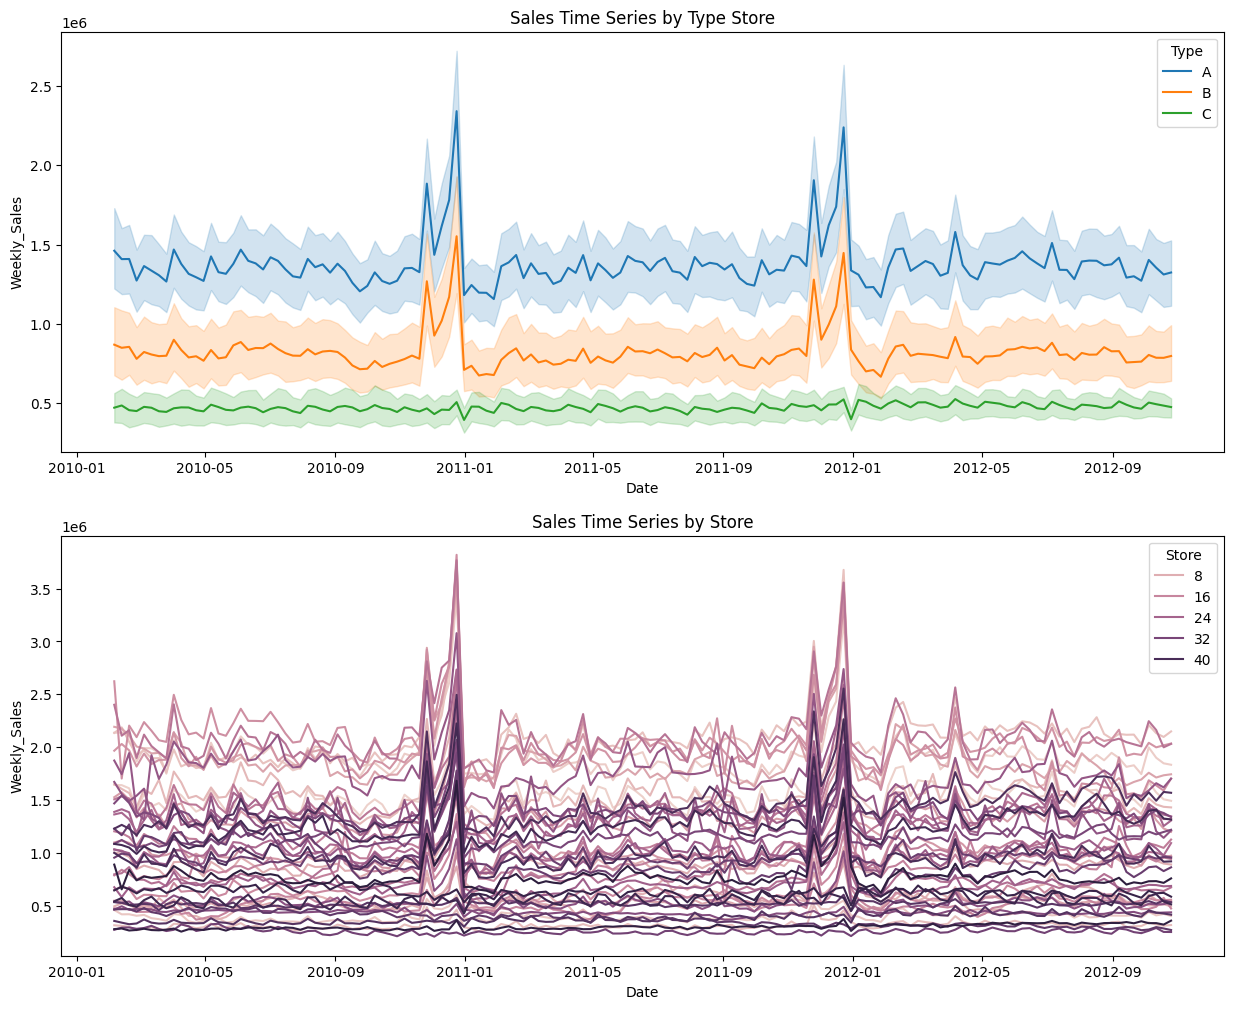

In [13]:
fig, ax = plt.subplots(2,1,figsize=(15,12))

sns.lineplot(new_data,x='Date',
             y='Weekly_Sales', hue='Type',
             ax=ax[0])

sns.lineplot(new_data,x='Date',
             y='Weekly_Sales', hue='Store',
             ax=ax[1])

ax[0].set_title('Sales Time Series by Type Store')
ax[1].set_title('Sales Time Series by Store')

plt.show()

### Outliers

In [90]:
numerical_columns = new_data.select_dtypes(include=['int','float']).drop(columns=['Store'])

In [91]:
numerical_columns

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1643690.90
1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1641957.44
2,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,1611968.17
3,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,1409727.59
4,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,1554806.68
...,...,...,...,...,...,...,...,...,...,...
6430,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,713173.95
6431,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,733455.07
6432,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,734464.36
6433,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,718125.53


In [100]:
def plot_distribution_by_column(column_name:str) -> None:

    fig,ax = plt.subplots(2,1, sharex=True)

    sns.histplot(new_data,x=column_name,
                ax=ax[0])
    sns.boxenplot(new_data,x=column_name,
                ax=ax[1], color='orange')

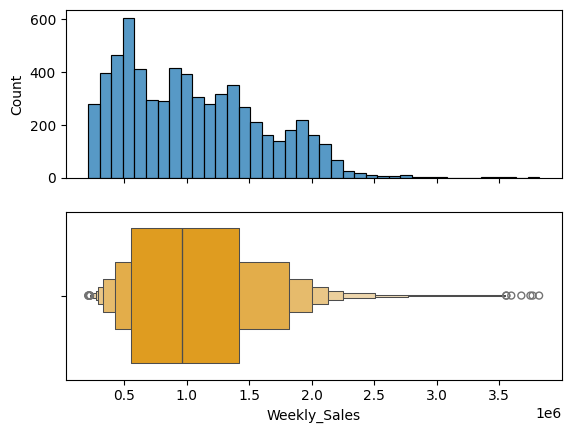

In [101]:
plot_distribution_by_column("Weekly_Sales")

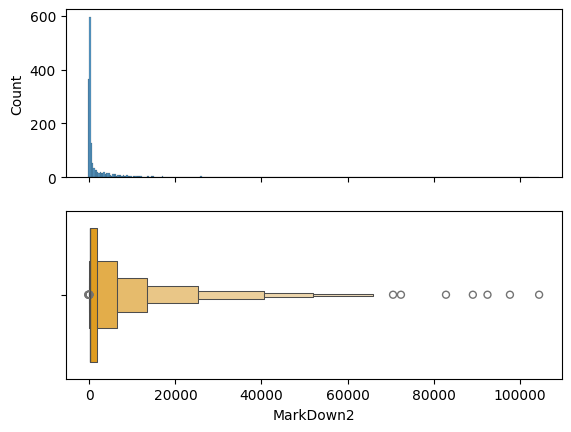

In [116]:
plot_distribution_by_column("MarkDown2")

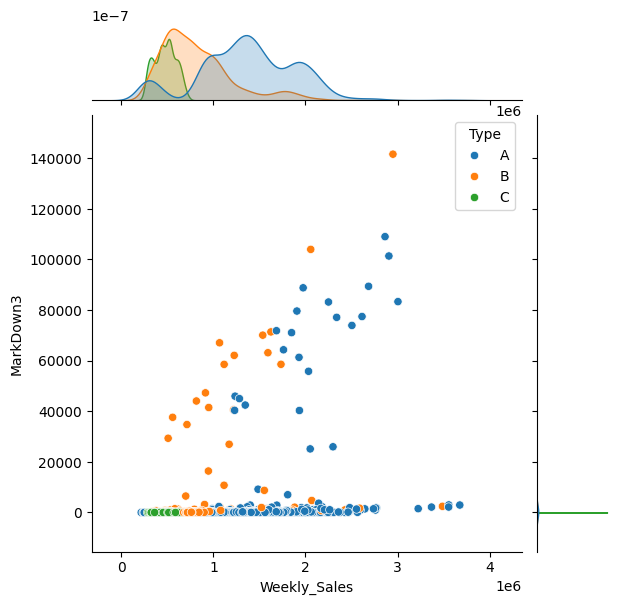

In [126]:
sns.jointplot(data=new_data, x="Weekly_Sales", y="MarkDown3",
              hue='Type')

In [132]:
print('Porcentaje de datos a existentes:')
1 - new_data.isna().mean()

Porcentaje de datos a existentes:


Store           1.000000
Date            1.000000
Temperature     1.000000
Fuel_Price      1.000000
MarkDown1       0.354312
MarkDown2       0.254390
MarkDown3       0.317949
MarkDown4       0.305361
MarkDown5       0.356643
CPI             1.000000
Unemployment    1.000000
IsHoliday       1.000000
Weekly_Sales    1.000000
Type            1.000000
dtype: float64

In [133]:
print('Porcentaje de datos a imputar:')
new_data.isna().mean()

Porcentaje de datos a imputar:


Store           0.000000
Date            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.645688
MarkDown2       0.745610
MarkDown3       0.682051
MarkDown4       0.694639
MarkDown5       0.643357
CPI             0.000000
Unemployment    0.000000
IsHoliday       0.000000
Weekly_Sales    0.000000
Type            0.000000
dtype: float64

Debido a la cantidad de datos faltantes y aparentes outliers, se decide eliminar esas columnas

In [134]:
new_data = new_data.drop(columns=['MarkDown1','MarkDown2','MarkDown3',
                                 'MarkDown4','MarkDown5'])

In [137]:
print(new_data.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday', 'Weekly_Sales', 'Type'],
      dtype='object')


Analizar el tipo de variables que tenemos y cuales utilizaremos para el entrenamiento. En el proceso de feature engineering podemos encontrar feautures como:
* Future Covariates (Known/Unknow):
    + Known: Variables que se conocen con anticipación, como fechas o dias festivos
    + Unknown: Variables que no se conocen con anticipación, como el clima o la demanda, de las cuales se tendran que usar predicciones o valores retrasados (lag future values) (retardos distribuidos)
* Past Covariates
* Static Covariates

In [138]:
future_covariate_known = ['IsHoliday']
future_covariate_unknown = ['Temperature','Fuel_Price','CPI','Unemployment']
past_covariates = ['Date']
statis_covariates = ['Type','Store']

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales,Type
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,1643690.90,A
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,1641957.44,A
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,1611968.17,A
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,1409727.59,A
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,1554806.68,A
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,64.88,3.997,192.013558,8.684,False,713173.95,B
6431,45,2012-10-05,64.89,3.985,192.170412,8.667,False,733455.07,B
6432,45,2012-10-12,54.47,4.000,192.327265,8.667,False,734464.36,B
6433,45,2012-10-19,56.47,3.969,192.330854,8.667,False,718125.53,B


Time Series Decomposition

In [140]:
from darts.utils.statistics import check_seasonality
from darts.utils.statistics import extract_trend_and_seasonality

In [143]:
from darts.timeseries import TimeSeries

In [ ]:
TimeSeries.from_dataframe(new_data,time_col='Date',
                          value_cols=['Store','Temperature','Fuel_Price',
                                      'CPI','IsHoliday'])